# Object detection via color-based image segmentation
https://towardsdatascience.com/object-detection-via-color-based-image-segmentation-using-python-e9b7c72f0e11

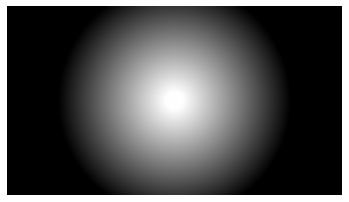

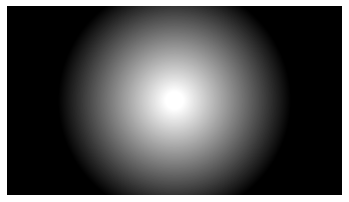

In [42]:
#Segmenting the image into 17 gray levels then measure each level's area using contouring
import cv2
import numpy as np
import matplotlib.pyplot as plt
def viewImage(image):
    plt.imshow(image, cmap = 'gray', interpolation = 'bicubic')
    plt.axis('off')
    plt.show()
def grayscale_17_levels (image):
    high = 255
    while(1):  
        low = high - 15
        col_to_be_changed_low = np.array([low])
        col_to_be_changed_high = np.array([high])
        curr_mask = cv2.inRange(gray, col_to_be_changed_low,col_to_be_changed_high)
        gray[curr_mask > 0] = (high)
        high -= 15
        if(low == 0 ):
            break
image = cv2.imread('ombre_circle_grayscale.png')
image = image.astype('uint8')
viewImage(image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
viewImage(gray)

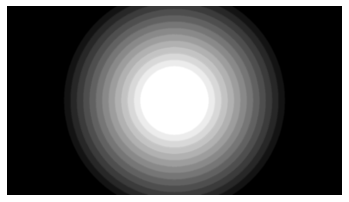

In [57]:
grayscale_17_levels(gray)
gray = gray.astype('uint8')
viewImage(gray)

In [64]:
def get_area_of_each_gray_level(im):
## convert image to gray scale (must br done before contouring)
    image = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    output = []
    high = 255
    first = True
    while(1):
        low = high - 15
        if(first == False):
        # making values that are of a greater gray level black 
                    ## so it won't get detected  
            to_be_black_again_low = np.array([high])
            to_be_black_again_high = np.array([255])
            curr_mask = cv2.inRange(image, to_be_black_again_low, to_be_black_again_high)
            image[curr_mask > 0] = (0)

        # making values of this gray level white so we can calculate
        # it's area
        ret, threshold = cv2.threshold(image, low, 255, 0)
        contours, hirerchy = cv2.findContours(threshold, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
        if(len(contours) > 0):
            output.append([cv2.contourArea(contours[0])])
            cv2.drawContours(im, contours, -1, (0,0,255), 3)
            high -= 15
            first = False
        if(low == 0 ):
            break
    return output

In [66]:
get_area_of_each_gray_level(gray)

error: OpenCV(3.4.2) /tmp/build/80754af9/opencv-suite_1535558553474/work/modules/imgproc/src/color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'CvtHelper'


In [ ]:
image = cv2.imread('./path/to/image.jpg')
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
viewImage(hsv_img) ## 1
green_low = np.array([45 , 100, 50] )
green_high = np.array([75, 255, 255])
curr_mask = cv2.inRange(hsv_img, green_low, green_high)
hsv_img[curr_mask > 0] = ([75,255,200])
viewImage(hsv_img) ## 2
## converting the HSV image to Gray inorder to be able to apply 
## contouring
RGB_again = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)
gray = cv2.cvtColor(RGB_again, cv2.COLOR_RGB2GRAY)
viewImage(gray) ## 3
ret, threshold = cv2.threshold(gray, 90, 255, 0)
viewImage(threshold) ## 4
contours, hierarchy =  cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, contours, -1, (0, 0, 255), 3)
viewImage(image) ## 5